## Project : Classification model

In [1]:
import pandas as pd                    
import seaborn as sns                  
import numpy as np
import matplotlib.pyplot as plt

import warnings                        
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
# loading the data
train = pd.read_csv(r"C:\Users\hp\Downloads\train.csv")
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
train.shape

(31647, 18)

In [5]:
test = pd.read_csv(r"C:\Users\hp\Downloads\test.csv")
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [7]:
test.shape

(13564, 17)

### EDA

<Axes: >

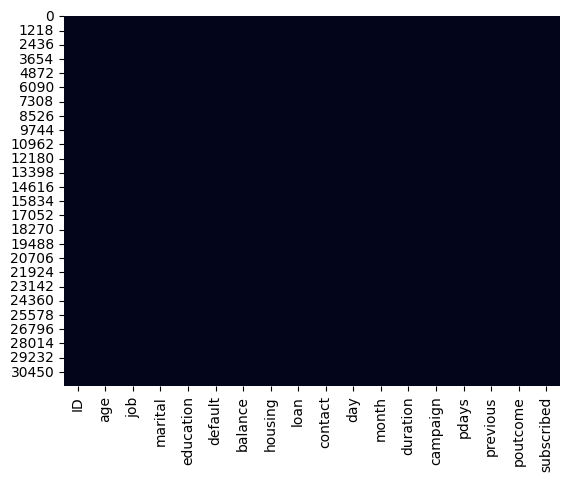

In [8]:
sns.heatmap(train.isnull(),cbar=False)  #no null values

In [9]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [10]:
train['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d556027820>,
 [Text(-1.0260416824313123, 0.39653305778146924, ''),
  Text(1.026041719557412, -0.3965329617165124, '')],
 [Text(-0.5596590995079885, 0.21629075878989232, '88.26'),
  Text(0.5596591197585883, -0.21629070639082493, '11.74')])

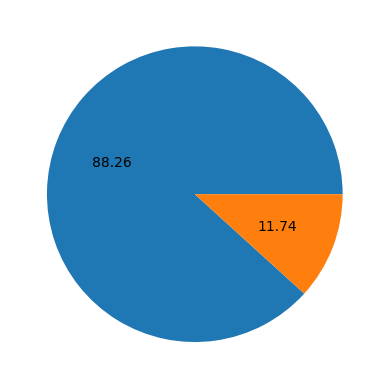

In [11]:
plt.pie(train['subscribed'].value_counts(),autopct='%0.2f')

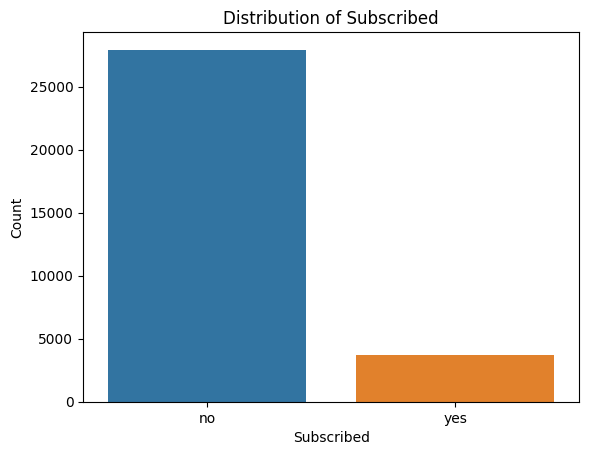

In [12]:
value_counts = train['subscribed'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.title('Distribution of Subscribed')
plt.show()


<Axes: xlabel='age', ylabel='Density'>

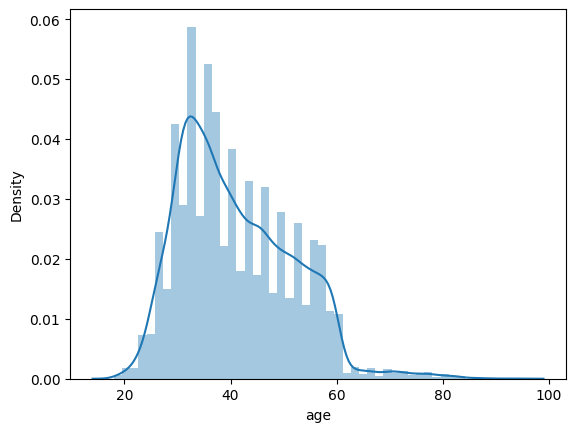

In [13]:
sns.distplot(train["age"])       #clients are mostly aged from 20-40

<Axes: xlabel='job'>

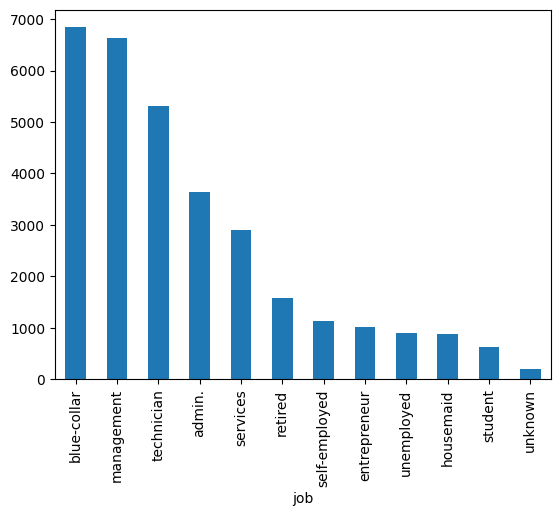

In [14]:
train['job'].value_counts().plot.bar()

<Axes: xlabel='default'>

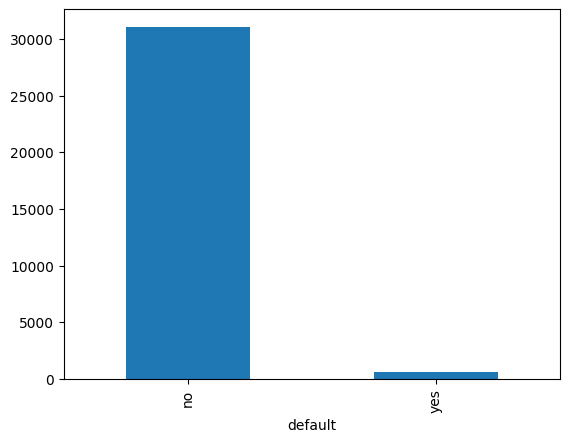

In [15]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

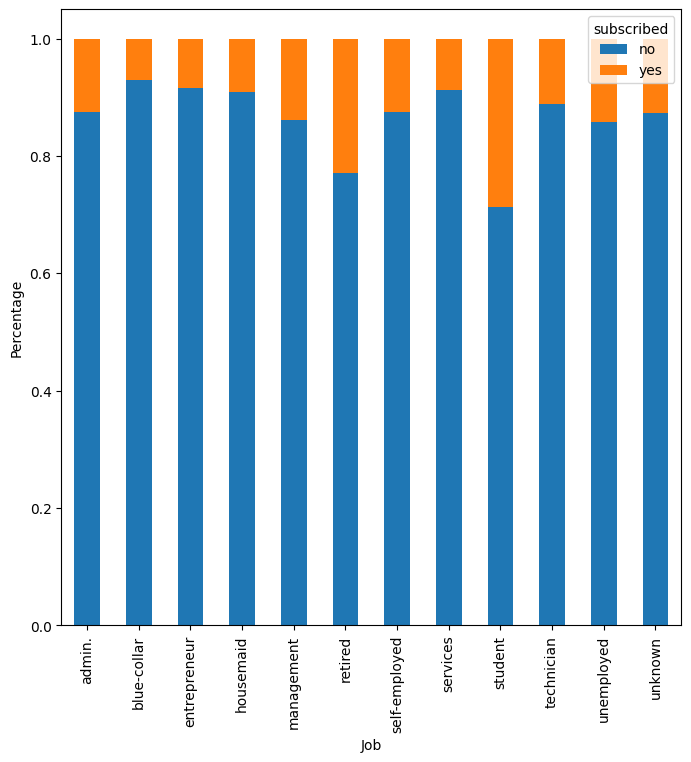

In [16]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [17]:
print(pd.crosstab(train['education'],train['subscribed']))
print(pd.crosstab(train['marital'],train['subscribed']))

subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176
subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

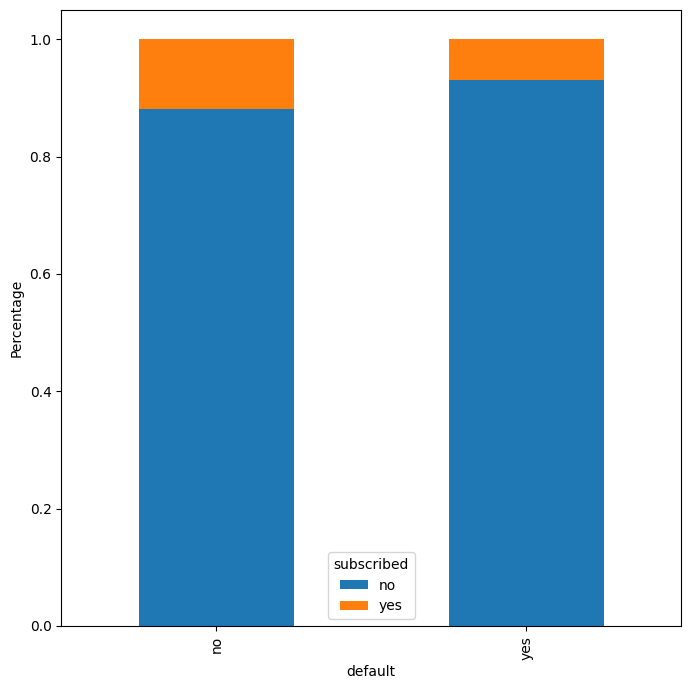

In [18]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

subscribed     no   yes
loan                   
no          23132  3384
yes          4800   331


Text(0, 0.5, 'Percentage')

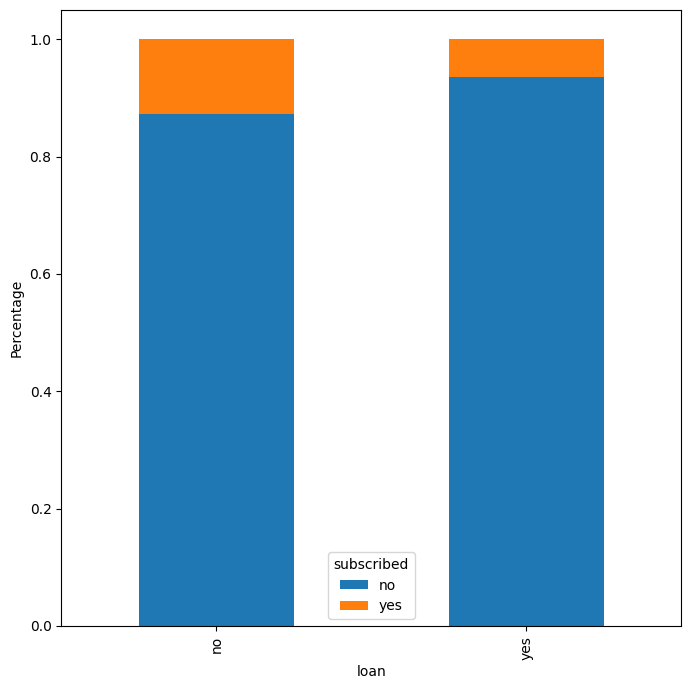

In [19]:
print(pd.crosstab(train['loan'],train['subscribed']))

default=pd.crosstab(train['loan'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('loan')
plt.ylabel('Percentage')

In [20]:
columns_to_encode = [ 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome','subscribed']
from sklearn.preprocessing import LabelEncoder
label_encoder = {}
for column in columns_to_encode:
    if column in train.columns:
        encode = LabelEncoder()
        train[column] = encode.fit_transform(train[column])
        label_encoder[column] = encode

In [21]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


<Axes: xlabel='duration', ylabel='Count'>

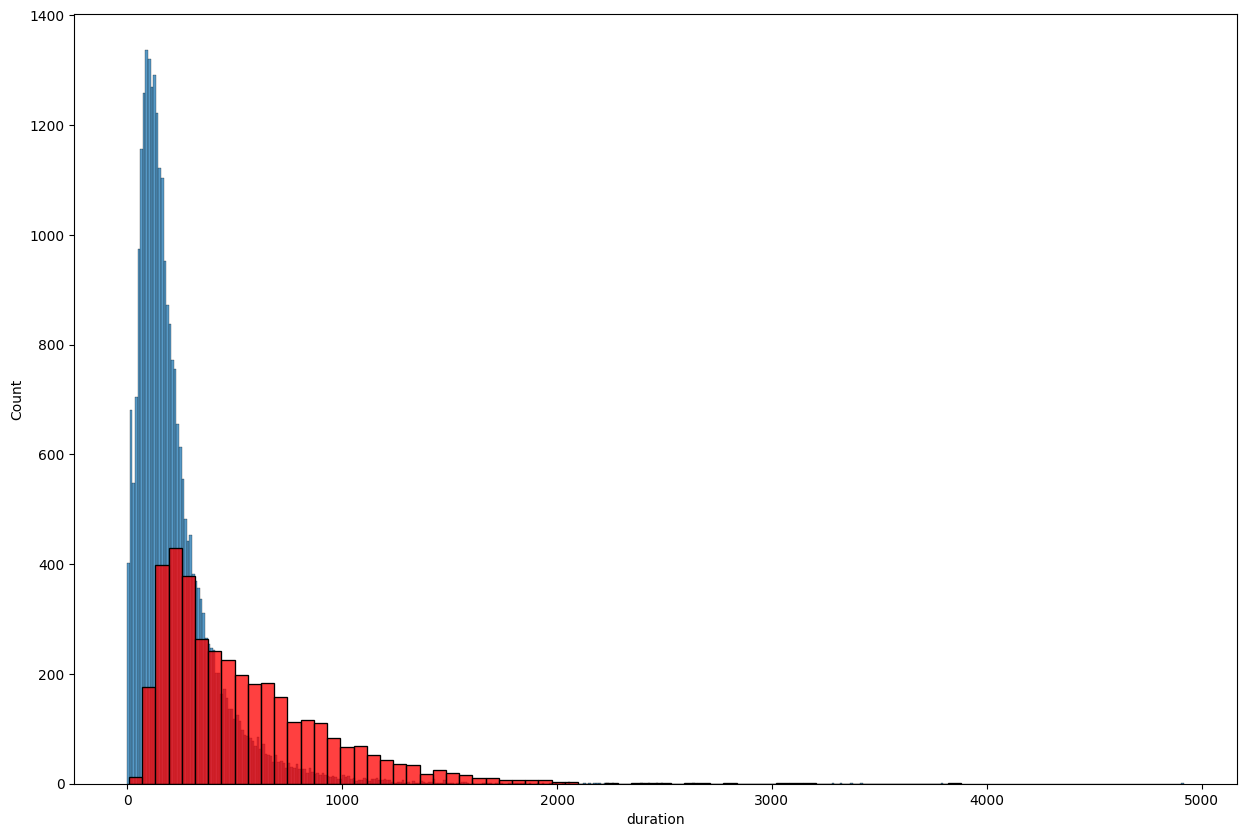

In [22]:
plt.figure(figsize=(15, 10))
sns.histplot(train[train['subscribed'] == 0]['duration'])
sns.histplot(train[train['subscribed'] == 1]['duration'], color='red')


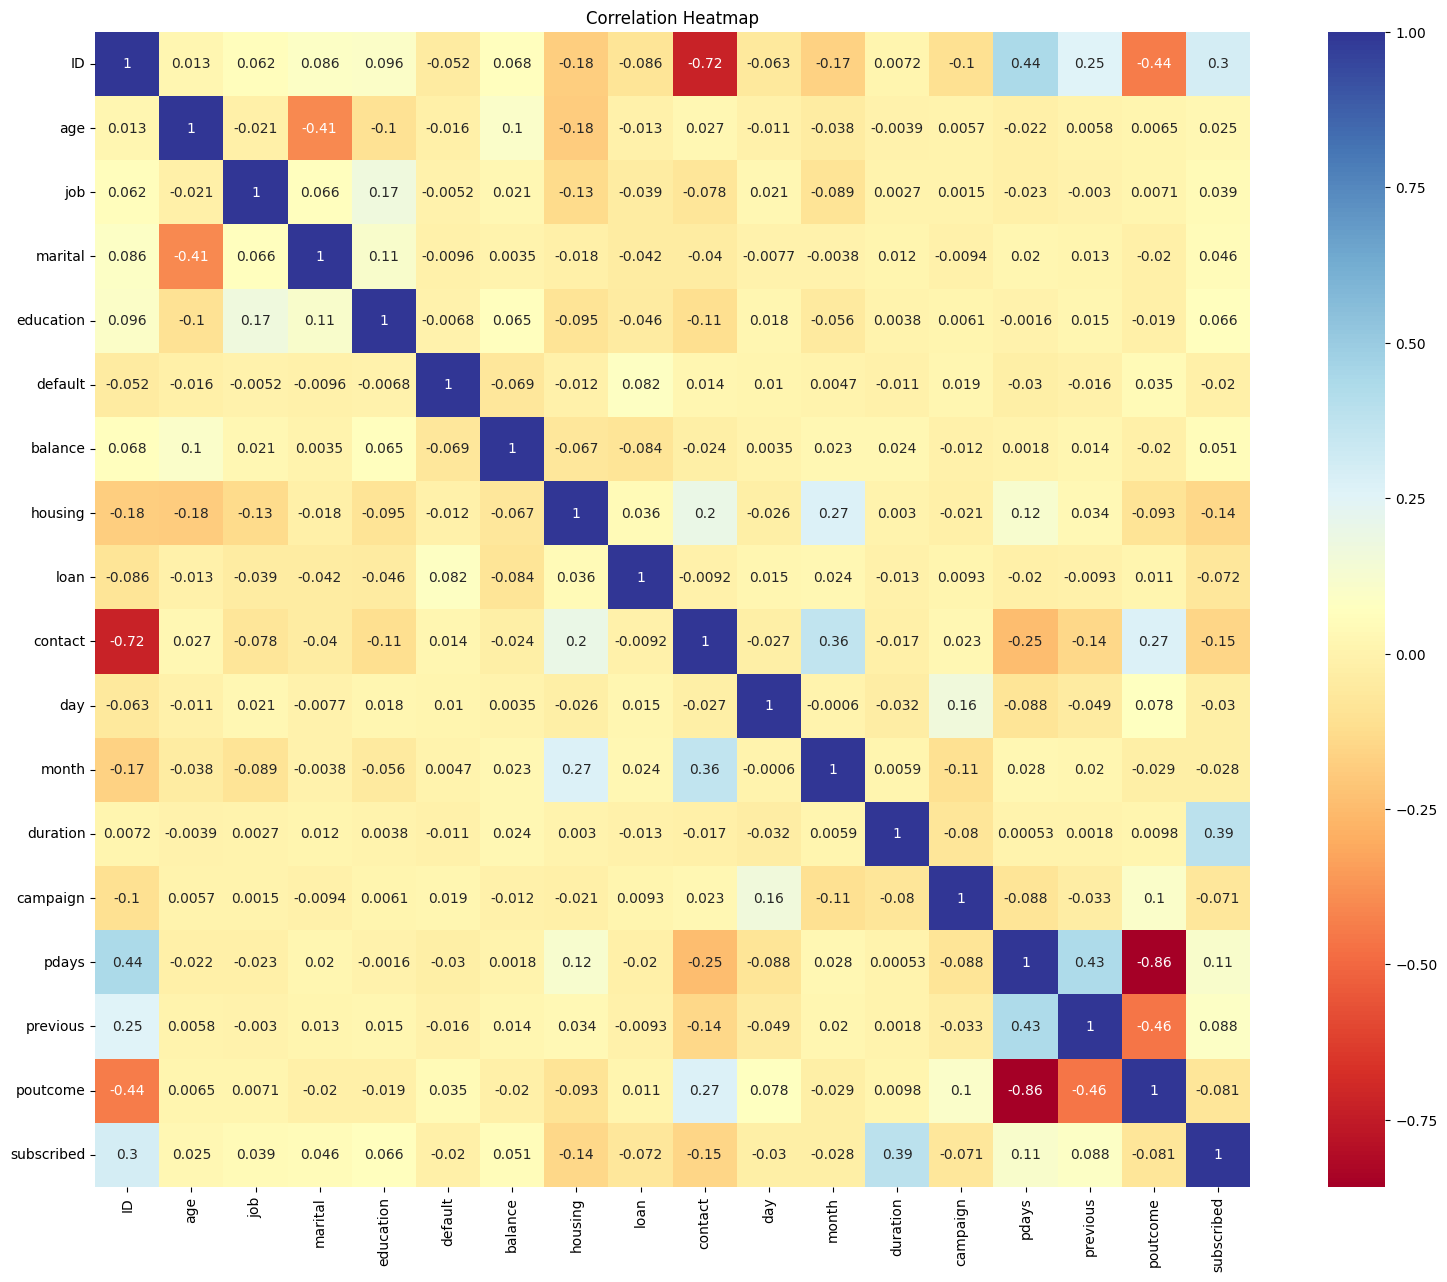

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

sns.heatmap(train.corr(), vmax=1, square=True, annot=True, cmap="RdYlBu")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
x=train.drop(['subscribed'],axis=1)
x.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3


### Model Building

In [25]:
y=train['subscribed']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int32

In [26]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(x,y)


# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importances)

      Feature  Importance
12   duration    0.275768
0          ID    0.229011
6     balance    0.082903
1         age    0.073779
10        day    0.061952
11      month    0.044244
2         job    0.038752
14      pdays    0.033528
13   campaign    0.031571
16   poutcome    0.029154
4   education    0.022124
3     marital    0.018441
15   previous    0.018415
7     housing    0.017178
9     contact    0.014377
8        loan    0.007093
5     default    0.001709


###### Tuing for best hyperparameters

In [27]:
param_grid = {
    'min_samples_split': [1,2,3, 5,7],
    'min_samples_leaf': [1,2,3,4,5],
    'max_depth': [15,18,20,22,25]
}


In [28]:
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in columns_to_encode:
    if column in train.columns:
        encoder = label_encoder[column]  # Retrieve the fitted encoder for the column
        test[column] = encoder.transform(test[column])


###### Model Creation

In [29]:
model = RandomForestClassifier(n_estimators=100,min_samples_leaf=2,min_samples_split=3,max_depth=20)
model.fit(x,y)
prediction = model.predict(test)
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
submission = pd.DataFrame()

In [31]:
submission['subscribed'] = prediction

In [32]:
#Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [33]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [34]:
submission.to_csv('submission.csv', header=False, index=False)

###### Now you have the submission file with you. Follow these steps to generate your score:
1. Open the submission.csv file.
2. Copy the values in the subscribed column and paste them in the subscribed column of solution_checker.xlsx file.
3. You will see the accuracy of the model on test dataset under Your accuracy score column.